In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np 


In [2]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

data=pd.read_csv('Mall_Customers.csv')
data['Gender']=le.fit_transform(data['Gender'])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [3]:
pca=PCA(2)
d=pca.fit(data).transform(data)
Data=pd.DataFrame(d)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(Data,test_size=0.2)
X_train=x_train.sort_index()
X_train.head()

,0,1
0,-109.383941,5.478454
1,-108.202857,-34.931765
2,-107.376292,37.840872
3,-106.007807,-30.562696
4,-104.980323,7.296747


In [5]:
from sklearn.cluster import KMeans
k=5
kmean=KMeans(n_clusters=k)
kmean=kmean.fit(X_train)
labels=kmean.labels_
centroids=kmean.cluster_centers_

In [6]:
prediction=kmean.predict(x_test)

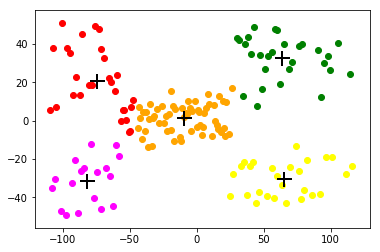

In [8]:
import matplotlib.pyplot as plt
colors=['yellow','red','green','magenta','orange','blue']
y=0
for x in labels:
    plt.scatter(X_train.iloc[y,0],X_train.iloc[y,1],color=colors[x])
    y+=1
for x in range(k):
    lines=plt.plot(centroids[x,0],centroids[x,1],'k+')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
plt.show()